# Introduction
This notebook contains data analysis to support my investigation into the USDA Ag Census. The aim of this project was to draw insight from the USDA Ag Census that is useful for General Mills' sustainability team. 

I focused on three aspects of the USDA Ag Census


1.   Organic agriculture
2.   Characteristic of producers
3.  Farming operations operating at gains and losses



All the data in this notebook is obtained using the USDA NASS Quick Stats API interface or through the Census Data Query Tool. USDA NASS Quick Stats can be found here: https://quickstats.nass.usda.gov/. Information regarding the API can be found here: https://quickstats.nass.usda.gov/api. The Census Data Query Tool can be found here: https://www.nass.usda.gov/Quick_Stats/

In [0]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import requests, json
import seaborn as sns
import copy

# Organic Agriculture at a Glance
The natural and organic branch of General Mills is interested in identifying interesting trends and findings regarding organic agriculture. In this section I focused on...


*   Age of organic farmers
*   Days worked off farm for organic farmers
* Primary occupation of organic farmers
* The number of organic operations
* Sales of organic goods

Since the data of interest covers a broad range of categories I used the USDA CDQT. You can download the tables as csv fiels. [Census Table 51](https://www.nass.usda.gov/Quick_Stats/CDQT/chapter/1/table/51/state/US) contains all the information regarding organic farmers.

**Read in the data and do some preliminary formatting.**

In [67]:
#Read in data
df_org = pd.read_csv('Organic Agriculture Pull CDQT.csv')

#Drop unwanted columns
df_org = df_org.drop(['state fips', 'county', 'county code'], axis = 1)

#Fill na with -9999 so nan does not interfere with removing commas and converting to numeric
df_org = df_org.fillna(-9999)

#Format values to numeric and remove commas
years = ['2017', '2012', '2007', '1997']
for y in years:
  df_org[y] = pd.to_numeric(df_org[y].astype(str).str.replace(',',''))

#Inspect
df_org.head()

,state,commodity,data item,domain category,2017,2012,2007,2002,1997
0,US TOTAL,COMMODITY TOTALS,"COMMODITY TOTALS, ORGANIC - OPERATIONS WITH SALES",-9999,-9999.0,-9999,-9999,-9999.0,-9999.0
1,US TOTAL,COMMODITY TOTALS,"COMMODITY TOTALS, ORGANIC - OPERATIONS WITH SALES",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),18166.0,14326,-9999,-9999.0,-9999.0
2,US TOTAL,COMMODITY TOTALS,"COMMODITY TOTALS, ORGANIC - OPERATIONS WITH SALES","ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT) AND SALES: (LESS THAN 5,000 $)",3867.0,4289,-9999,-9999.0,-9999.0
3,US TOTAL,COMMODITY TOTALS,"COMMODITY TOTALS, ORGANIC - OPERATIONS WITH SALES","ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT) AND SALES: (5,000 TO 9,999 $)",1470.0,1116,-9999,-9999.0,-9999.0
4,US TOTAL,COMMODITY TOTALS,"COMMODITY TOTALS, ORGANIC - OPERATIONS WITH SALES","ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT) AND SALES: (10,000 TO 24,999 $)",2137.0,1706,-9999,-9999.0,-9999.0


**First goal is to make a pie chart of all the ages of organic farmers**

In [68]:
#Filter to ages
df_org_ages = df_org[(df_org['data item'].str.contains('AGE')) & (df_org['domain category'].str.contains('ORG'))]
df_org_ages = df_org_ages.reset_index(drop = True)

#Last row contained average age which we will use later
avg_age = df_org_ages.iloc[-1]

#Remvoe last entry
df_org_ages = df_org_ages.iloc[:-1]

#Inspect
df_org_ages.head()

,state,commodity,data item,domain category,2017,2012,2007,2002,1997
0,US TOTAL,PRODUCERS,"PRODUCERS, AGE LT 25 - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),1320.0,-9999,-9999,-9999.0,-9999.0
1,US TOTAL,PRODUCERS,"PRODUCERS, AGE 25 TO 34 - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),5586.0,-9999,-9999,-9999.0,-9999.0
2,US TOTAL,PRODUCERS,"PRODUCERS, AGE 35 TO 44 - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),7099.0,-9999,-9999,-9999.0,-9999.0
3,US TOTAL,PRODUCERS,"PRODUCERS, AGE 45 TO 54 - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),7082.0,-9999,-9999,-9999.0,-9999.0
4,US TOTAL,PRODUCERS,"PRODUCERS, AGE 55 TO 64 - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),10071.0,-9999,-9999,-9999.0,-9999.0


Text(0.5, 1.0, 'Ages of Organic Farmers')

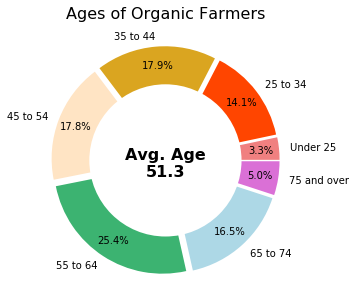

In [69]:
#Construct pie chart

#Collect values and contruct labels
values = df_org_ages['2017'].values
labels = ['Under 25', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 to 74', '75 and over']

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Create spacing between pie slices
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#Plot outer piechart
ax.pie(x = values, labels = labels, autopct = '%1.1f%%', pctdistance = 0.83, explode = explode,
        colors = ['lightcoral', 'orangered', 'goldenrod', 'bisque', 'mediumseagreen', 'lightblue', 'orchid'])

#Draw white circle in center
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Add average age text
ax.text(0,-0.15,'Avg. Age\n51.3', fontsize = 16, weight = 'bold', ha = ('center'))

#Set title
ax.set_title('Ages of Organic Farmers', fontsize = 16)

**The average age of an organic farmer is 51.3 years old in 2017. The plurality of farmers are 55 to 64 years old. There are very few young farmers (<34 years old).**



---


**The next goal is to get the breakdown of days worked off farm by organic farmers. This could be interesting when compared to the percent of organic farmers that consider farming to be their primary occupation. The data for this section comes from the same organic table in the CDQT.** 

In [70]:
#Filter to days off farm
df_org_days = df_org[(df_org['data item'].str.contains('DAYS WORKED')) & (df_org['domain category'].str.contains('ORG'))]
df_org_days = df_org_days.reset_index(drop = True)

#Inspect
df_org_days.head()

,state,commodity,data item,domain category,2017,2012,2007,2002,1997
0,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, 0 DAYS - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),19098.0,-9999,-9999,-9999.0,-9999.0
1,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, GE 1 DAYS - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),20588.0,-9999,-9999,-9999.0,-9999.0
2,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, 1 TO 49 DAYS - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),4800.0,-9999,-9999,-9999.0,-9999.0
3,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, 50 TO 99 DAYS - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),2081.0,-9999,-9999,-9999.0,-9999.0
4,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, 100 TO 199 DAYS - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),3391.0,-9999,-9999,-9999.0,-9999.0


Text(0.5, 1.0, 'Organic Farmers Days Worked Off Farm')

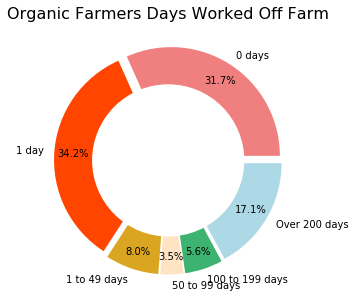

In [71]:
#Construct pie chart for days worked off farm for organic farmers

#Collect values and contruct pie chart
values = df_org_days['2017'].values
labels = ['0 days', '1 day', '1 to 49 days', '50 to 99 days', '100 to 199 days', 'Over 200 days']

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Create spacing between pie slices
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#Plot pie chart
ax.pie(x = values, labels = labels, autopct = '%1.1f%%', pctdistance = 0.83, explode = explode,
        colors = ['lightcoral', 'orangered', 'goldenrod', 'bisque', 'mediumseagreen', 'lightblue', 'orchid'])
  
#Draw white circle
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Set the title
ax.set_title('Organic Farmers Days Worked Off Farm', fontsize = 16)

**This graph suggests that the majority of organic farmers spend 1 day or less working off farm. This seems at odds with the notion that many farmers do not consider farming to be their primary profession. However, the third largest category is working over 200 days of farm. It appears that organic farmers either rarely work off farm or work off farm for the majority of the year.**



---


**The next goal is to confirm our hunch about the majority of organic farmers considering farming to be their primary occupation. We will again use the pie chart format.**

In [72]:
#Filter to primary occupation data
df_org_oc = df_org[(df_org['data item'].str.contains('PRIMARY')) & (df_org['domain category'].str.contains('ORG'))]
df_org_oc = df_org_oc.reset_index(drop = True)

#Inspect
df_org_oc.head()

,state,commodity,data item,domain category,2017,2012,2007,2002,1997
0,US TOTAL,PRODUCERS,"PRODUCERS, PRIMARY OCCUPATION, FARMING - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),25225.0,-9999,-9999,-9999.0,-9999.0
1,US TOTAL,PRODUCERS,"PRODUCERS, PRIMARY OCCUPATION, (EXCL FARMING) - NUMBER OF PRODUCERS",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),14461.0,-9999,-9999,-9999.0,-9999.0


Text(0.5, 1.0, 'Organic Farmers Primary Occupation')

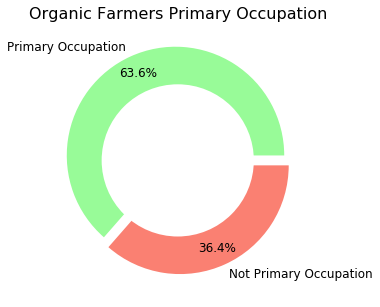

In [73]:
#Construct pie chart of whether organic farmers consider farming to be their primary occupation.

#Collect values and construct pie chart
values = df_org_oc['2017'].values
labels = ['Primary Occupation', 'Not Primary Occupation']

#Construct figure
fig, ax = plt.subplots(figsize = (5,5))

#Create spaces between slices of pie chart
explode = (0.05, 0.05)

#Plot pie chart
ax.pie(x = values, labels = labels, autopct = '%1.1f%%', pctdistance = 0.83, explode = explode,
        colors = ['palegreen', 'salmon'], textprops = {'fontsize':12})

#Draw white circle
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Set the title
ax.set_title('Organic Farmers Primary Occupation', fontsize = 16)

**The majority of organic farmers consider farming to be their primary occupation. What is it about organic farming that allows farmers that participate in it to consider it their primary occupation? Is it more lucrative than conventional farming? Are there lower expenses?**



---


**The next investigation will be about the organic sales and the number of organic operations. How have these changed over time?**



In [74]:
#Filter to number of operations, total sales, and sales per operation
df_org_sales = df_org[(df_org['data item'].str.contains('SALES')) & (df_org['domain category'] == 'ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT)')]
df_org_sales = df_org_sales.reset_index(drop = True)

#Inspect
df_org_sales.head()

,state,commodity,data item,domain category,2017,2012,2007,2002,1997
0,US TOTAL,COMMODITY TOTALS,"COMMODITY TOTALS, ORGANIC - OPERATIONS WITH SALES",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),1.816600e+04,14326,-9999,-9999.0,-9999.0
1,US TOTAL,COMMODITY TOTALS,"COMMODITY TOTALS, ORGANIC - SALES, MEASURED IN $",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),7.277350e+09,3120717000,-9999,-9999.0,-9999.0
2,US TOTAL,COMMODITY TOTALS,"COMMODITY TOTALS, ORGANIC - SALES, MEASURED IN $ / OPERATION",ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),4.006030e+05,-9999,-9999,-9999.0,-9999.0


Text(0.5, 1.0, 'Number of Operations with Organic Sales Reported to USDA Census')

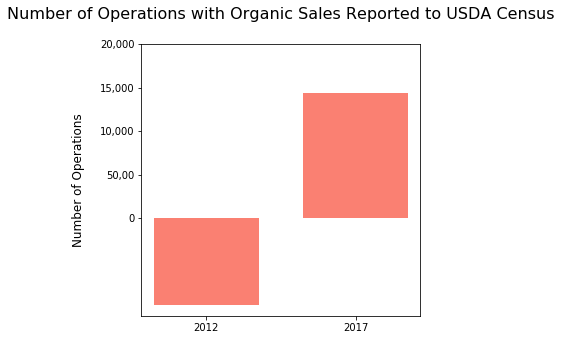

In [75]:
#Create a barplot for the number of organic operations

#Filter to number of operations
operations = df_org_sales.iloc[0][5:7].values[::-1]

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Plot barplot
ax.bar(x = [0,0.5], height = operations, width = 0.35, color = 'salmon')

#Format xticks and xtick labels
ax.set_xticks([0,0.5])
ax.set_xticklabels(['2012', '2017'])

#Format yticks and ytick labels
ax.set_yticks([0,5000,10000,15000,20000])
ax.set_yticklabels(['0', '50,00', '10,000', '15,000', '20,000'])

#Format axis labels and title
ax.set_ylabel('Number of Operations', fontsize = 12, labelpad = 15)
ax.set_title('Number of Operations with Organic Sales Reported to USDA Census', pad = 25, fontsize = 16)

**In 2017 there were about 18,000 organic operations. In the span of 5 years, the number of organic operations increased by almost 27%. For context, there are about 2.2 million farms in the US as of 2017. A growth of 27% seems quite fast. We will want to compare this to the growth rate of all farms.**



---

**The next step is to look at the sales of organic agricultural goods and how they changed over time.**

Text(0.5, 1.0, ' Yearly Organic Sales From Farms Reported to USDA Census')

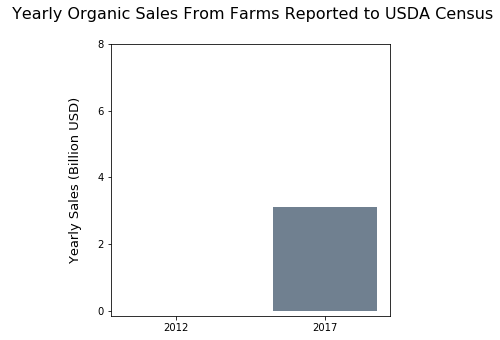

In [76]:
#Sales bar graphs


#Filter to sales
sales = df_org_sales.iloc[1][5:7].values[::-1]

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Plot barplot
ax.bar(x = [0,0.5], height = sales, width = 0.35, color = 'slategray')

#Format x and y ticks and labels
ax.set_xticks([0,0.5])
ax.set_xticklabels(['2012', '2017'])
ax.set_yticks([0,2000000000,4000000000,6000000000,8000000000])
ax.set_yticklabels(['0', '2', '4', '6', '8'])

#Format axis labels and title
ax.set_ylabel('Yearly Sales (Billion USD)', fontsize = 13, labelpad = 15)
ax.set_title(' Yearly Organic Sales From Farms Reported to USDA Census', pad = 25, fontsize = 16)

**There was massive growth in organic sales from 2012 to 2017. Sales more than doubled over this 5 year span. Again, the total organic sales makes up a miniscule fraction of the sales of all agricultural goods. However, the rapid growth of this secotr is promosing for organic brands and products.**

# Conventional Producer Characteristics

The goal of this section to look at the characteristics of conventional producers and operations. We can compare these against the characteristics of organic producers and operations which we just looked at. This analysis will provide context for the organic findings.

Topics covered include...
*   Age of organic farmers
*   Days worked off farm for organic farmers
* Primary occupation of organic farmers
* The number of organic operations
* Sales of organic goods

The data for this analysis was pulled from USDA CDQT. Producer characteristics can be found in [Table 52](https://www.nass.usda.gov/Quick_Stats/CDQT/chapter/1/table/52/state/US) and sales and operations data can be found in [Table 1](https://www.nass.usda.gov/Quick_Stats/CDQT/chapter/1/table/1/state/US).

**Read in data and do preliminary formatting.**

In [77]:
#Read in data
df_producer = pd.read_csv('Producer Characteristics Pull CDQT.csv')

#Drop unwanted columns
df_producer = df_producer.drop(['state fips', 'county', 'county code', 'domain category'], axis = 1)

#Fill na with -9999 so nan does not interfere with removing commas and converting to numeric
df_producer = df_producer.fillna(-9999)

#Format values to numeric and remove commas
years = ['2017', '2012', '2007', '1997']
for y in years:
  df_producer[y] = pd.to_numeric(df_producer[y].astype(str).str.replace(',',''))

#Inspect
df_producer.head()

,state,commodity,data item,2017,2012,2007,2002,1997
0,US TOTAL,PRODUCERS,PRODUCERS - NUMBER OF PRODUCERS,3399834.0,-9999.0,-9999.0,-9999.0,-9999.0
1,US TOTAL,"PRODUCERS, PRINCIPAL","PRODUCERS, PRINCIPAL - NUMBER OF PRODUCERS",2740453.0,-9999.0,-9999.0,-9999.0,-9999.0
2,US TOTAL,"PRODUCERS, (EXCL PRINCIPAL)","PRODUCERS, (EXCL PRINCIPAL) - NUMBER OF PRODUCERS",659381.0,-9999.0,-9999.0,-9999.0,-9999.0
3,US TOTAL,"PRODUCERS, PRIMARY","PRODUCERS, PRIMARY - NUMBER OF PRODUCERS",2042220.0,-9999.0,-9999.0,-9999.0,-9999.0
4,US TOTAL,PRODUCERS,"PRODUCERS, MALE - NUMBER OF PRODUCERS",2172373.0,-9999.0,-9999.0,-9999.0,-9999.0


**As with organic farmers, age will be the first characteristic to examine.**

In [78]:
#Filter to ages
df_producer_ages = df_producer[(df_producer['data item'].str.contains('AGE ')) & (df_producer['commodity'] == 'PRODUCERS') & (~df_producer['data item'].str.contains('LE'))]
df_producer_ages = df_producer_ages.reset_index(drop = True)

#Inspect
df_producer_ages.head()

,state,commodity,data item,2017,2012,2007,2002,1997
0,US TOTAL,PRODUCERS,"PRODUCERS, AGE LT 25 - NUMBER OF PRODUCERS",50943.0,-9999.0,-9999.0,-9999.0,-9999.0
1,US TOTAL,PRODUCERS,"PRODUCERS, AGE 25 TO 34 - NUMBER OF PRODUCERS",234496.0,-9999.0,-9999.0,-9999.0,-9999.0
2,US TOTAL,PRODUCERS,"PRODUCERS, AGE 35 TO 44 - NUMBER OF PRODUCERS",390345.0,-9999.0,-9999.0,-9999.0,-9999.0
3,US TOTAL,PRODUCERS,"PRODUCERS, AGE 45 TO 54 - NUMBER OF PRODUCERS",614654.0,-9999.0,-9999.0,-9999.0,-9999.0
4,US TOTAL,PRODUCERS,"PRODUCERS, AGE 55 TO 64 - NUMBER OF PRODUCERS",955354.0,-9999.0,-9999.0,-9999.0,-9999.0


**We can make a pie chart to depict the distribution of farmer age.**

Text(0.5, 1.0, 'Ages of All Farmers')

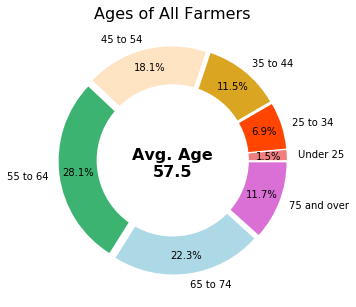

In [79]:
#Pie chart for farmer age

#Collect values and labels
values = df_producer_ages['2017'].values
labels = ['Under 25', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 to 74', '75 and over']

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Spacing between pie slices
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#Plot pie chart
ax.pie(x = values, labels = labels, autopct = '%1.1f%%', pctdistance = 0.83, explode = explode,
        colors = ['lightcoral', 'orangered', 'goldenrod', 'bisque', 'mediumseagreen', 'lightblue', 'orchid'])

#Draw white circle
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Add average age text
ax.text(0,-0.15,'Avg. Age\n57.5', fontsize = 16, weight = 'bold', ha = ('center'))

#Title
ax.set_title('Ages of All Farmers', fontsize = 16)

**The average age of farmers nationwide in 2017 was 57.5. This means that the average age of organic farmers is lower than that of all farmers combined. The percentage of conventional farmers that are older than 55 is much higher than the percentage of organic farmers older than 55.**



---


**The next step is to look at days worked off farm. More days worked off farm suggests that farming is not the primary occupation of farmers.**

In [80]:
#Filter to days off farm
df_producer_days = df_producer[(df_producer['data item'].str.contains('DAYS WORKED')) & (df_producer['commodity'] == 'PRODUCERS')]
df_producer_days = df_producer_days.reset_index(drop = True)

#Inspect
df_producer_days

,state,commodity,data item,2017,2012,2007,2002,1997
0,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, 0 DAYS - NUMBER OF PRODUCERS",1311334.0,-9999.0,-9999.0,-9999.0,-9999.0
1,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, GE 1 DAYS - NUMBER OF PRODUCERS",2088500.0,-9999.0,-9999.0,-9999.0,-9999.0
2,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, 1 TO 49 DAYS - NUMBER OF PRODUCERS",285477.0,-9999.0,-9999.0,-9999.0,-9999.0
3,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, 50 TO 99 DAYS - NUMBER OF PRODUCERS",151972.0,-9999.0,-9999.0,-9999.0,-9999.0
4,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, 100 TO 199 DAYS - NUMBER OF PRODUCERS",282056.0,-9999.0,-9999.0,-9999.0,-9999.0
5,US TOTAL,PRODUCERS,"PRODUCERS, DAYS WORKED OFF OPERATION, GE 200 DAYS - NUMBER OF PRODUCERS",1368995.0,-9999.0,-9999.0,-9999.0,-9999.0


**Make pie chart to visualize days worked off farm for all US farmers in 2017.**

Text(0.5, 1.0, 'Farmers Days Worked Off Farm')

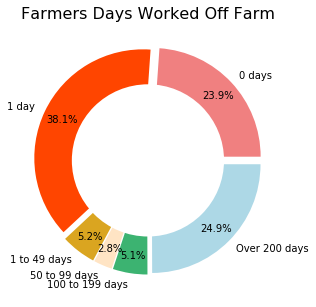

In [81]:
#Pie chart for days worked off farm

#Collect values and labels
values = df_producer_days['2017'].values
labels = ['0 days', '1 day', '1 to 49 days', '50 to 99 days', '100 to 199 days', 'Over 200 days']

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Spacing between pie slices
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#Plot pie chart
ax.pie(x = values, labels = labels, autopct = '%1.1f%%', pctdistance = 0.83, explode = explode,
        colors = ['lightcoral', 'orangered', 'goldenrod', 'bisque', 'mediumseagreen', 'lightblue', 'orchid'])
  
#Draw white circle
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Set title
ax.set_title('Farmers Days Worked Off Farm', fontsize = 16)

**As with organic farmers, it is most common to work 1 day or less off farm and the next most common category is working 200 days off farm. Based on this graphic alone, we would not expect a little more than 50% of farmers to consider farming to be their primary occupation. We can confirm our estimate by looking at primary occupation data.**

In [82]:
#Filter to occupation
df_producer_oc = df_producer[(df_producer['data item'].str.contains('OCCUPATION')) & (df_producer['commodity'] == 'PRODUCERS')]

#Inspect
df_producer_oc.head()

,state,commodity,data item,2017,2012,2007,2002,1997
16,US TOTAL,PRODUCERS,"PRODUCERS, PRIMARY OCCUPATION, FARMING - NUMBER OF PRODUCERS",1416848.0,-9999.0,-9999.0,-9999.0,-9999.0
20,US TOTAL,PRODUCERS,"PRODUCERS, PRIMARY OCCUPATION, (EXCL FARMING) - NUMBER OF PRODUCERS",1982986.0,-9999.0,-9999.0,-9999.0,-9999.0


**Build pie chart for primary occupation data.**

Text(0.5, 1.0, 'Farmers Primary Occupation')

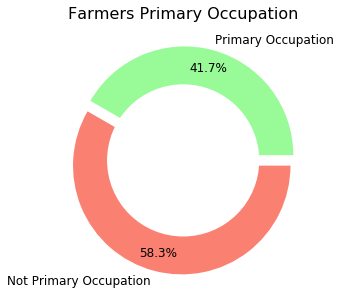

In [83]:
#Pie chart for primary occupation data

#Collect values and labels
values = df_producer_oc['2017'].values
labels = ['Primary Occupation', 'Not Primary Occupation']

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Spacing for pie slices
explode = (0.05, 0.05)

#Plot pie chart
ax.pie(x = values, labels = labels, autopct = '%1.1f%%', pctdistance = 0.83, explode = explode,
        colors = ['palegreen', 'salmon'], textprops = {'fontsize':12})

#Draw white circle
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Add title
ax.set_title('Farmers Primary Occupation', fontsize = 16)

**Almost 60% of farmers do not consider farming to be their primary occupation. This is quite suprising given that 62% of farmers spend one day or less working off farm. This graphic is in stark contrast to its organic farmers analog where the majority of farmers considered farming to be their primary occupation.**



---

**Now we will take a look at the sales data and the number of operations. We need to read in some new data to do this. See the introduction of this section for the sources.**

In [84]:
#Read in data
df_hist = pd.read_csv('Historical Highlights Pull CDQT.csv')

#Drop unwanted columns
df_hist = df_hist.drop(['state fips', 'county', 'county code'], axis = 1)

#df_hist = df_hist[df_hist['data item'] == 'COMMODITY TOTALS - SALES, MEASURED IN $']
df_hist = df_hist[(df_hist['data item'] == 'FARM OPERATIONS - NUMBER OF OPERATIONS') & (df_hist['domain category'].isnull())]

#Format values to numeric and drop commas
years = ['2017', '2012', '2007', '2002', '1997']

for y in years:
  df_hist[y] = pd.to_numeric(df_hist[y].astype(str).str.replace(',',''))
  
#Inspect
df_hist.head()

,state,commodity,data item,domain category,2017,2012,2007,2002,1997
0,US TOTAL,FARM OPERATIONS,FARM OPERATIONS - NUMBER OF OPERATIONS,NaN,2042220,2109303,2204792,2128982,2215876


**Create bar graph for sales of all agricultural goods in US.**

Text(0.5, 1.0, 'Yearly Agricultural Sales From Farms Reported to USDA Census')

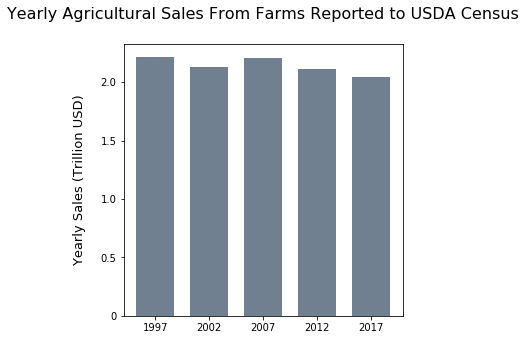

In [85]:
#Sales bar graphs

#Filter to sales data
sales = df_hist.iloc[0][4:10].values[::-1]

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Plot barplot
ax.bar(x = [0, 0.5, 1, 1.5, 2], height = sales, width = 0.35, color = 'slategray')

#Handle ticks and tick labels
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.set_xticklabels(['1997', '2002', '2007', '2012', '2017'])
ax.set_yticklabels(['0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0'])

#Format axis labels and titles
ax.set_ylabel('Yearly Sales (Trillion USD)', fontsize = 13, labelpad = 15)
ax.set_title('Yearly Agricultural Sales From Farms Reported to USDA Census', pad = 25, fontsize = 16)

**The sales of agricultural goods have been declining since 2007. This is in stark contrast to the sales of organic goods which more than doubled in a 5 year period. Based off sales data, there is a lot of promise in organic products in comparison to conventional ones.**



---


**The next step is to look at the number of operations.**

Text(0.5, 1.0, 'Number of Operations with Sales Reported to USDA Census')

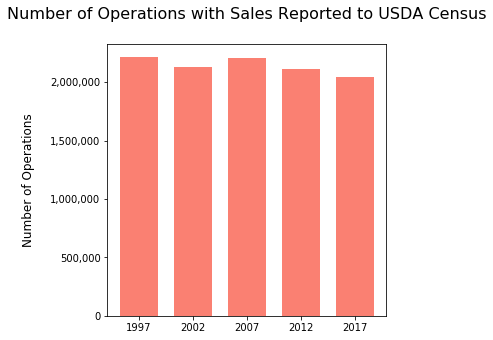

In [86]:
#Number of operations bar graph

#Filter to number of operations
operations = df_hist.iloc[0][4:10].values[::-1]

#Create figure
fig, ax = plt.subplots(figsize = (5,5))

#Plot barplot
ax.bar(x = [0, 0.5, 1, 1.5, 2], height = operations, width = 0.35, color = 'salmon')

#Format ticks and tick labels
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.set_xticklabels(['1997', '2002', '2007', '2012', '2017'])
ax.set_yticks([0, 500000, 1000000, 1500000, 2000000])
ax.set_yticklabels(['0', '500,000', '1,000,000', '1,500,000', '2,000,000'])

#Format axis labels and title
ax.set_ylabel('Number of Operations', fontsize = 12, labelpad = 15)
ax.set_title('Number of Operations with Sales Reported to USDA Census', pad = 25, fontsize = 16)

**The number of farming operations has been declining since 2007, but still remains around the 2 million mark. This means that organic operations accounts for less than 1% of all farming operations.**

# Gains and Losses

The goal of this section is to obtain a sense of the number of farming operation operating at a gain or loss in a given year. We are interested in seeing how this varies at different geographic scales (national, state, county). It is critical to understand where farms are succeeding in order to dive deeper into the root causes of this success.

The data from this section is obtained from the USDA NASS Quick Stats API. Information regarding this can be found in the introduction. We will be looking at the number of operations operating at a gain and at a loss based on **ON FARM** income which includes sales, on farm expenses, government payments, and on farm related activities. This **DOES NOT** include income from other jobs which is an important distinction because more than 50% of farmers do not consider their primary occupation. 

**Access data from NASS Quick Stats API. We will start at the coarsest resolution available: nationwide.**

In [87]:
#Prepare payload
api_key = 'XXX' 

#Selection of years
years = map(str,range(1981,2018))

#Payload to extract 
payload = {'key':api_key,
	   'source_desc':'CENSUS',
     'sector_desc': 'ECONOMICS',
     'group_desc': 'INCOME',
	   'commodity_desc':'INCOME, NET CASH FARM',
	   'domain_desc' : 'TOTAL',
	   'agg_level_desc':'NATIONAL',
	   'year':years,
	   'format':'JSON',
          }

#Items of interest
item = ['INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN',
       'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH LOSS',
       'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH NET INCOME']

#Empty df to store results
df_all = pd.DataFrame()

#Loop through each item to create new payloads
for i in item:
    payload['short_desc'] = i
    r = requests.get('http://quickstats.nass.usda.gov/api/api_GET/?key='+api_key, params = payload)
    df = pd.read_json(json.dumps(r.json()),orient='split')
    df_all = pd.concat([df_all, df])
    print(i)
    
#Format columns by removing commas and changing dtypes
df_all['Value'] = df_all['Value'].str.replace(',','')
df_all['Value'] = pd.to_numeric(df_all['Value'])
df_all = df_all[['Value', 'short_desc', 'state_name', 'year']]
df_ntl = df_all.reset_index(drop = True)

INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN
INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH LOSS
INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH NET INCOME


**We now have all the data we need to do this analysis at the national level. We need to get it into a useful format by finding the percent of operations operating at a loss nationwide in every available year.**

In [0]:
#Need to find the percent of operations operating at a loss in each year

#Create dictionary to store results
perc_loss_ntl_dict = {}

#Iterate through unique years
for y in df_ntl['year'].unique():
  
  #Filter down to year
  df = df_ntl[df_ntl['year'] == y]
  
  #Calculate percent of operations operating at a loss
  gain = df[df['short_desc'] == 'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN']['Value'].values
  loss = df[df['short_desc'] == 'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH LOSS']['Value'].values
  total = df[df['short_desc'] == 'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH NET INCOME']['Value'].values
  perc_loss = (loss/total)*100
  
  #Save result. Year is key. Percent is value.
  perc_loss_ntl_dict[y] = perc_loss

**Go from dictionary to dataframe with the help of pandas.**

In [89]:
#Dictionary to dataframe
perc_loss_ntl = pd.DataFrame.from_dict(perc_loss_ntl_dict)

#Formatting
perc_loss_ntl = perc_loss_ntl.transpose().reset_index()
perc_loss_ntl = perc_loss_ntl.rename(columns = {'index':'Year',
                               0:'Percent Operating at Loss'})

#Inspect
perc_loss_ntl.head()

,Year,Percent Operating at Loss
0,2017,56.354898
1,2012,53.897330
2,2007,52.964225
3,2002,53.312241


**We can visualize the data using a barplot.**

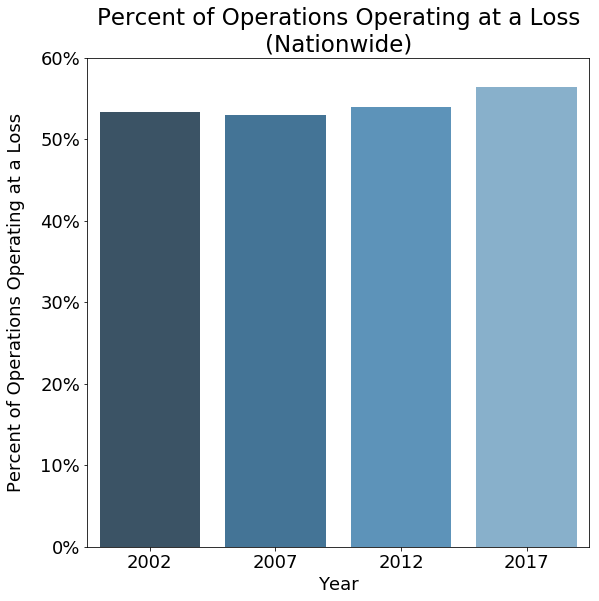

In [90]:
#Create barplot for number of operations operating at a loss nationwide

#Create figure
fig, ax = plt.subplots(figsize = (9,9))

#Plot barplot
ax = sns.barplot(x = 'Year', y = 'Percent Operating at Loss', data = perc_loss_ntl, palette = 'Blues_d')

#Set title
ax.set_title('Percent of Operations Operating at a Loss\n(Nationwide)', fontsize = 23)

#Format axis labels
ax.set_ylabel('Percent of Operations Operating at a Loss', fontsize = 18, labelpad = 15)
ax.set_xlabel('Year', fontsize = 18)

#Format ticks and tick labels
ax.set_yticks(np.arange(0,70,10))
ax.yaxis.set_major_formatter(PercentFormatter()) #Useful for percent format labels
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)


plt.savefig('National Gains and Losses')

**The majority of farming operations have been operating at a loss since 2002. Again, thsi data is only based off of on farm income. In 2017, about 56% of operations operated at a loss. This is a sobering visualization of the state of farming. A natural question to ask is if this trend/signal can be detected a finer geographic detail. We can go one step further and go to the state level. **

In [91]:
#Prepare payload for state level analysis
api_key = 'XXX' 

#Years of interest
years = map(str,range(1981,2018))

#Payload to extract 
payload = {'key':api_key,
	   'source_desc':'CENSUS',
     'sector_desc': 'ECONOMICS',
     'group_desc': 'INCOME',
	   'commodity_desc':'INCOME, NET CASH FARM',
	   'domain_desc' : 'TOTAL',
	   'agg_level_desc':'STATE',
	   'year':years,
	   'format':'JSON',
          }

#Items of interest
item = ['INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN',
       'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH LOSS',
       'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH NET INCOME']

#Empty df to store results
df_all = pd.DataFrame()

#Loop through items and request payloads (takes a few seconds)
for i in item:
    payload['short_desc'] = i
    r = requests.get('http://quickstats.nass.usda.gov/api/api_GET/?key='+api_key, params = payload)
    df = pd.read_json(json.dumps(r.json()),orient='split')
    
    df_all = pd.concat([df_all, df])
    print(i)
    
#Formatting
df_all['Value'] = df_all['Value'].str.replace(',','')
df_all['Value'] = pd.to_numeric(df_all['Value'])
df_all = df_all[['Value', 'short_desc', 'state_name', 'year']]
df_state = df_all.reset_index()

#Inspect
df_state.head()

INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN
INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH LOSS
INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH NET INCOME


,index,Value,short_desc,state_name,year
0,0,16128,"INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN",ALABAMA,2017
1,1,17488,"INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN",ALABAMA,2012
2,2,21176,"INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN",ALABAMA,2007
3,3,20607,"INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN",ALABAMA,2002
4,4,492,"INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN",ALASKA,2017


**We need a better format to store this data. A multiindexed dataframe would be ideal with states and years as the indices. We can obtain this format by creating a dictionary where they keys are states and years and the values are the percent of operations operating at a loss.**

In [92]:
#Create dictionary that holds the percentage of operations operating at a loss for each state for all available years
perc_loss_state_dict = {}

#Cylce through states
for state in df_state['state_name'].unique():
  
  #Cycle through all years in state
  for y in df_state['year'].unique():
    #Filter to state and year
    df = df_state[(df_state['year'] == y) & (df_state['state_name'] == state)]
    
    #Calculate percent of operations operating at a loss
    gain = df[df['short_desc'] == 'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH GAIN']['Value'].values[0]
    loss = df[df['short_desc'] == 'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH LOSS']['Value'].values[0]
    total = df[df['short_desc'] == 'INCOME, NET CASH FARM, OF OPERATIONS - OPERATIONS WITH NET INCOME']['Value'].values[0]
    perc_loss = (loss/total)*100
    
    #Save results in a dictionary. Keys are states and years.
    perc_loss_state_dict[(state, y)] = [perc_loss, gain, loss, total]

#Build out multiindex df from dataframe
perc_loss_state = pd.DataFrame.from_dict(perc_loss_state_dict, orient="index", columns = ['Percent of Operations With Loss', 'Number with Gain', 'Number with Loss', 'Total Operations'])
perc_loss_state.index = pd.MultiIndex.from_tuples(perc_loss_state.index, names = ['State', 'Year'])

#Inspect
perc_loss_state.head()

Percent of Operations With Loss  ...  Total Operations
State   Year                                   ...                  
ALABAMA 2017                        60.268033  ...             40592
        2012                        59.540060  ...             43223
        2007                        56.564724  ...             48753
        2002                        54.332506  ...             45124
ALASKA  2017                        50.303030  ...               990

[5 rows x 4 columns]

**Now that we have the data in good format there are many different ways we can visualize it. We can start with an approach to visualize the distribution of the percent of operations operating at a gain in each state. Visualization is a combined histogram and boxplot with critical shading.**

In [0]:
#Deconstruct multiindex for natural filtering
perc_loss_state_df = perc_loss_state.reset_index()

#Function to construct plots
def plot(year):
  
  #Extract values of interest
  values = perc_loss_state_df[perc_loss_state_df['Year'] == year]['Percent of Operations With Loss']
  
  #Create figure. Share x-axis.
  f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize = (8,5))
  
  #Create box and whisker and histogram
  sns.boxplot(values, ax = ax_box, color = 'grey')
  sns.distplot(values, kde = False,  ax = ax_hist, color = 'black', bins = np.arange(20,85,5))

  #Format axis and tick labels of histogram
  ax_hist.set_xlabel('Percent of Operations Operating at a Loss', fontsize = 12)
  ax_hist.set_ylabel('Number of States', fontsize = 12)
  ax_hist.set_yticks(np.arange(0,25,5))
  ax_hist.set_xticks(np.arange(20,85,5))
  
  #Add shading
  ax_hist.axvspan(20,50, alpha = 0.2, color = 'green', label = 'More Operations At Gain Than Loss')
  ax_hist.axvspan(50,85, alpha = 0.2, color = 'red', label = 'More Operations at Loss Than Gain')

  #Remove margins for complete color coverage
  ax_hist.margins(x = 0)
  
  #Format title, xticks and x axis label for box and whisker
  ax_box.set_title('Percent of Operations Operating at a Loss in ' + str(year) +'\n(State Level)')
  ax_box.set_xticks(np.arange(20,85,5))
  ax_box.set_xlabel('')
  
  #Legend
  plt.legend(bbox_to_anchor = (1,0.6))

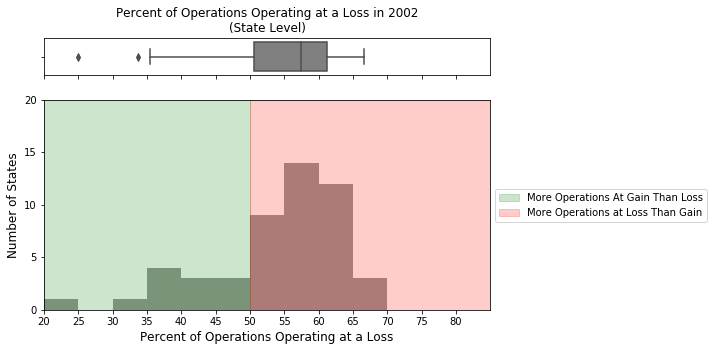

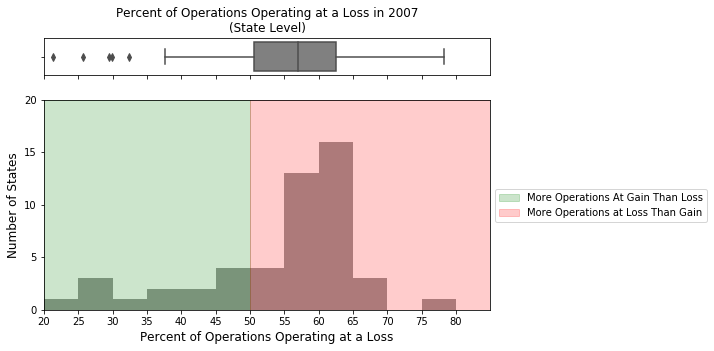

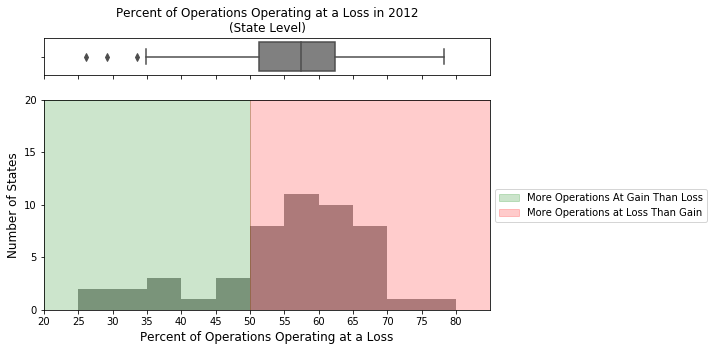

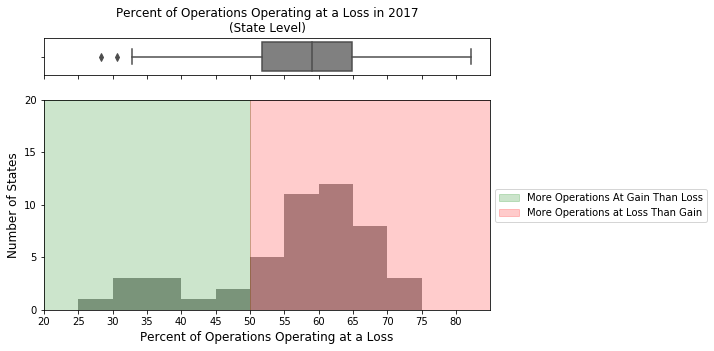

In [94]:
#Years of interest
years = [2002, 2007, 2012, 2017]

#Plot
for y in years:
  plot(y)

**This figure lets us easlily see the distribution of the percent of operations operating at a loss in each state. Bars in the red shading indicate that there are more operations operating at a loss than at a gain. More than 50% of the data falls in this red zone for every available year. Based on thsi graphic we can say that the national level analysis is not sufficient. The national level analysis is hiding the fact that there are some states doing very poorly.**

**One obvious downside to this visualization is that you cannot discern the unique states. It is critical to know which states are succeeding so we can learn from their success.**


In [0]:
#We can switch our perspective to finding the percent of operations operating at a gain

#Convert to % with gain and rename accordingly
perc_gain_state_df = copy.deepcopy(perc_loss_state_df[['State', 'Year', 'Percent of Operations With Loss', 'Total Operations']])
perc_gain_state_df['Percent of Operations with Gain'] = 100 - perc_loss_state_df['Percent of Operations With Loss']

#Convert state name to state abreviation
state_names = {'ALABAMA':'AL',
               'ALASKA': 'AK',
               'ARIZONA': 'AZ',
               'ARKANSAS': 'AR',
               'CALIFORNIA':'CA',
               'COLORADO':'CO',
               'CONNECTICUT':'CT',
                'DELAWARE':'DE',
               'FLORIDA':'FL',
               'GEORGIA':'GA',
               'HAWAII':'HI',
               'IDAHO': 'ID',
               'ILLINOIS':'IL',
               'INDIANA':'IN',
               'IOWA':'IA',
               'KANSAS':'KS',
               'KENTUCKY':'KY',
               'LOUISIANA':'LA',
               'MAINE':'ME',
               'MARYLAND':'MD',
               'MASSACHUSETTS':'MA',
               'MICHIGAN':'MI',
               'MINNESOTA':'MN',
               'MISSISSIPPI':'MS',
               'MISSOURI':'MO',
               'MONTANA':'MT',
               'NEBRASKA':'NE',
               'NEVADA':'NV',
               'NEW HAMPSHIRE':'NH',
               'NEW JERSEY':'NJ',
               'NEW MEXICO':'NM',
               'NEW YORK':'NY',
               'NORTH CAROLINA':'NC',
               'NORTH DAKOTA':'ND',
               'OHIO':'OH',
               'OKLAHOMA':'OK',
               'OREGON':'OR',
               'PENNSYLVANIA':'PA',
               'RHODE ISLAND':'RI',
               'SOUTH CAROLINA':'SC',
               'SOUTH DAKOTA':'SD',
               'TENNESSEE':'TN',
               'TEXAS':'TX',
               'UTAH':'UT',
               'VERMONT':'VT',
               'VIRGINA':'VA',
               'WASHINGTON':'WA',
               'WEST VIRGINIA':'WV',
               'WISCONSIN':'WI',
               'WY':'WYOMING'}

#Move from state names to state abbreviations using map function
perc_gain_state_df['State Abbreviation'] = perc_gain_state_df['State'].map(state_names)

**Create function to show the percent of operations operating at a gain in each state.**

In [0]:
#Plot to show each state and the percent of operations operating at a gain
def state_level_gains(year):
  
  #Filter to year and sort values
  perc_gain_state_2017 = perc_gain_state_df[perc_gain_state_df['Year'] == year]
  perc_gain_state_2017 = perc_gain_state_2017.sort_values(by = 'Percent of Operations with Gain')
  
  #Create figure
  fig, ax = plt.subplots(figsize = (22,7))
  
  #Plot barplot and horizontal line for interpretability
  ax = sns.barplot(x = 'State Abbreviation', y = 'Percent of Operations with Gain', data = perc_gain_state_2017, color = 'lightblue')
  ax.axhline(y=50, color = 'grey', linestyle = '--', linewidth = 4)

  #Handle ticks and tick labels
  ax.set_yticks(np.arange(0,90,10))
  ax.yaxis.set_major_formatter(PercentFormatter())
  plt.yticks(fontsize = 16)
  plt.xticks(fontsize = 14)

  #Handle axis labels
  ax.set_ylabel('Percent of Operations with Gain', fontsize = 18, labelpad = 20)
  ax.set_xlabel(' ', fontsize = 12, labelpad = 15)
  ax.set_title('Percent of Farming Operations with Gains in ' + str(year) + '\n(State Level)', fontsize = 23)

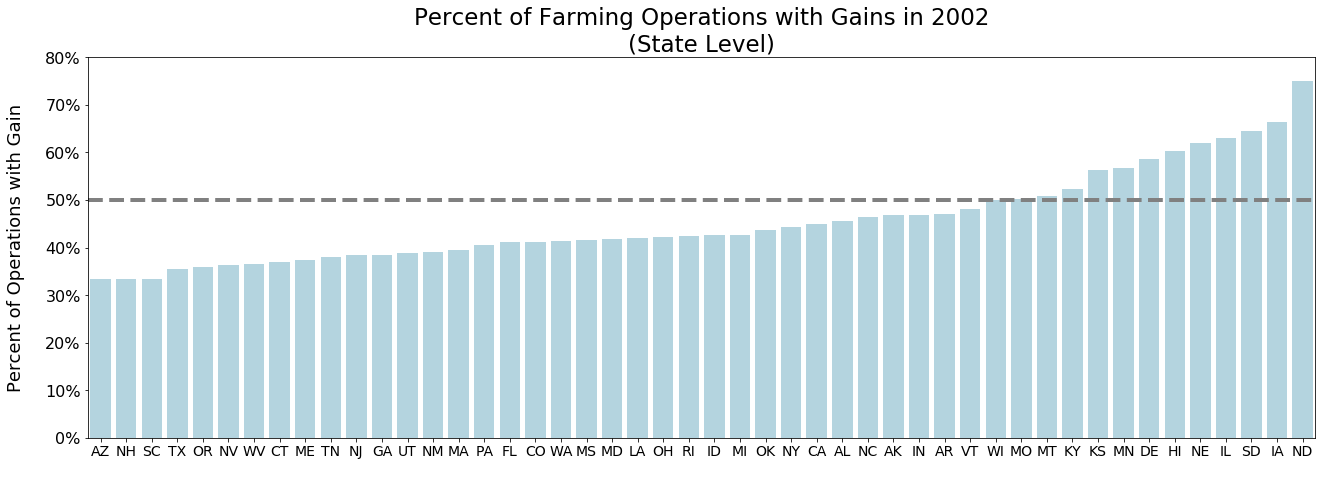

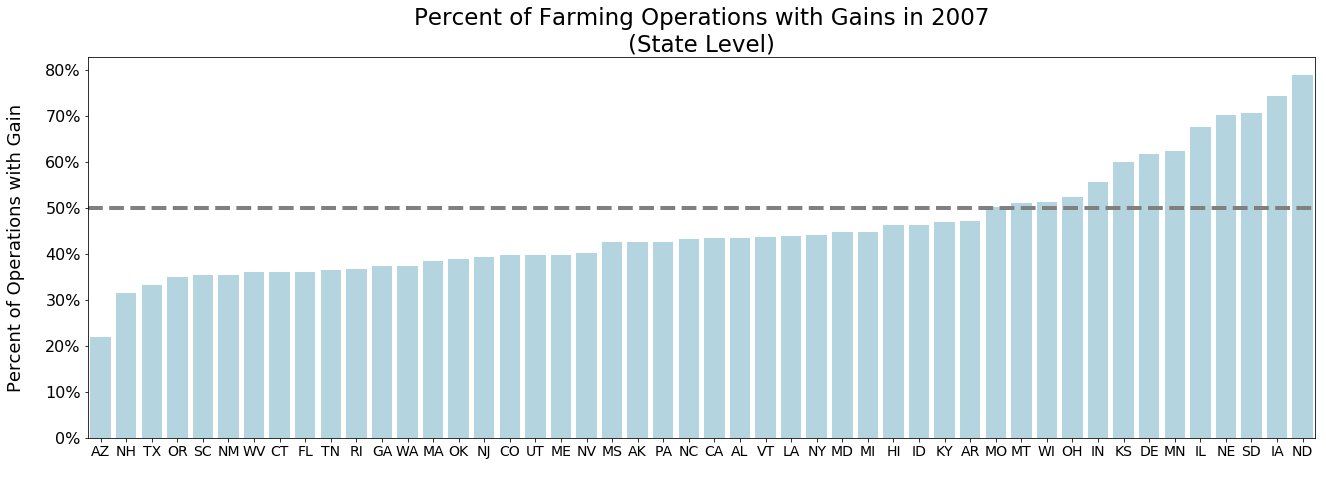

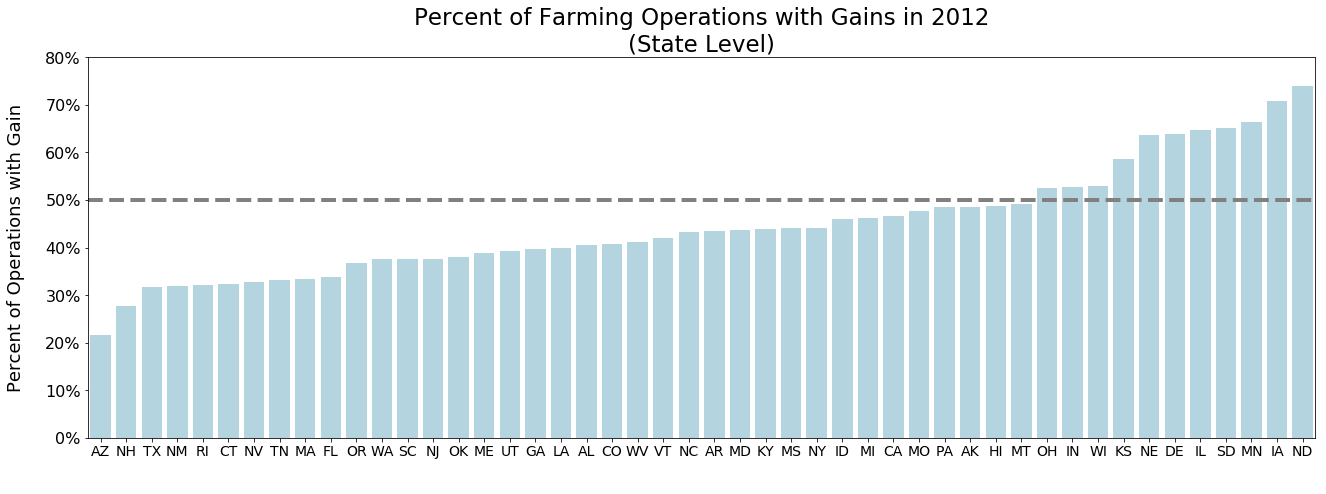

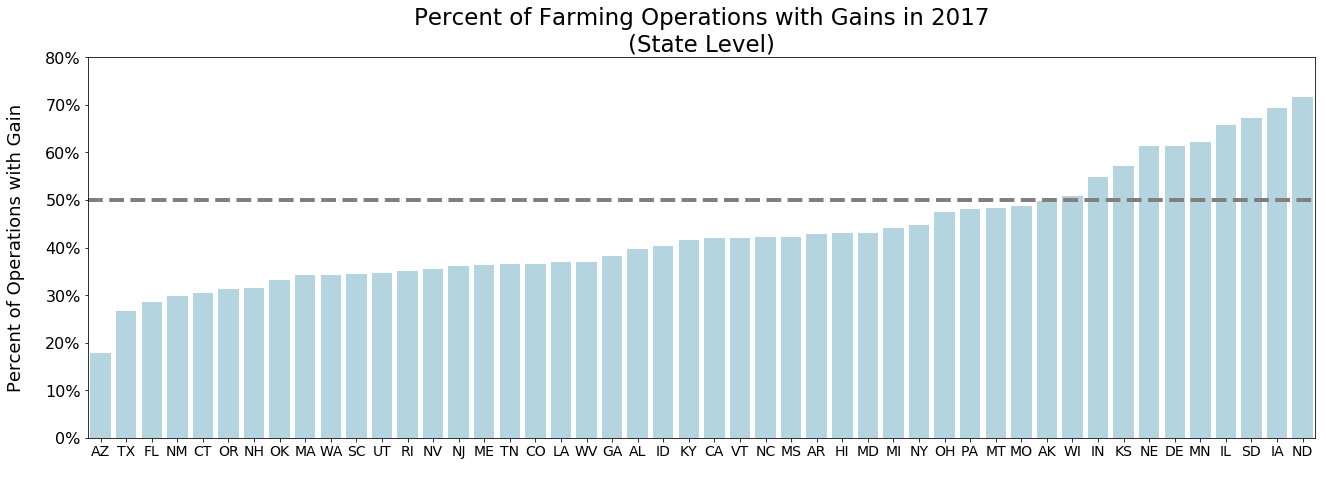

In [97]:
#Years of interest
years = [2002, 2007, 2012, 2017]

#Plot
for y in years:
  state_level_gains(y)

**The big takeaway from these graphics is that there are a few select states performing quite well. North Dakota and Iowa consistently have greater than 60% of their farming operations operating at a gain. We should use these states as case studies as to what it takes to have a successful farm. Of course, there are many confounding variables that make it difficult to determine precise predictions of farm success and failure.**

**It is also important that there is not much shifting in the order of states. This suggests that the problem is systemic and due to temporary variables like extreme weather events.**

**There is one more layer of geography that we can take advantage of: counties. The next step is to find the percentage of oeprations within each county operating at a loss every year. We can use this data to contruct a map that will show us "hot spots" of farm success.**

In [98]:
#Prepare the payload
api_key = '70D413B2-0123-3524-9634-F730BE441009' 

#Years of interest
years = map(str,range(1981,2018))

#Payload to extract 
payload = {'key':api_key,
	   'source_desc':'CENSUS',
     'sector_desc': 'ECONOMICS',
     'group_desc': 'INCOME',
	   'commodity_desc':'INCOME, NET CASH FARM',
	   'domain_desc' : 'TOTAL',
	   'agg_level_desc':'COUNTY',
	   'year':years,
	   'format':'JSON',
          }

#Items of interest
item = ['INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH GAIN',
       'INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH LOSS']

#Empty df to store results
df_all = pd.DataFrame()

#Loop through each item and request payload (takes a few seconds)
for i in item:
    payload['short_desc'] = i
    r = requests.get('http://quickstats.nass.usda.gov/api/api_GET/?key='+api_key, params = payload)
    df = pd.read_json(json.dumps(r.json()),orient='split')
    df_all = pd.concat([df_all, df])
    print(i)
    
#Formatting
df_all['Value'] = df_all['Value'].str.replace(',','')
df_all['Value'] = pd.to_numeric(df_all['Value'])
df_all = df_all[['Value', 'county_name', 'county_ansi', 'county_code', 'state_name', 'state_fips_code', 'state_ansi', 'short_desc', 'year']]
df_county = df_all.reset_index(drop = True)

INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH GAIN
INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH LOSS


**In order for this data to be mapped to a shapefile we need to create unique identifiers using the state and county fips code.**

In [99]:
#Create unique ID
df_county['state_fips_code'] = df_county['state_fips_code'].astype(str).str.zfill(2)
df_county['county_code'] = df_county['county_code'].astype(str).str.zfill(3)

#Combine state and county fips code
df_county['ID'] = df_county['state_fips_code'] + df_county['county_code']

#Inspect
df_county.head()

,Value,county_name,county_ansi,county_code,state_name,state_fips_code,state_ansi,short_desc,year,ID
0,242,COLBERT,033,033,ALABAMA,01,1,"INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH GAIN",2012,01033
1,323,COLBERT,033,033,ALABAMA,01,1,"INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH GAIN",2007,01033
2,236,COLBERT,033,033,ALABAMA,01,1,"INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH GAIN",2002,01033
3,366,FRANKLIN,059,059,ALABAMA,01,1,"INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH GAIN",2012,01059
4,475,FRANKLIN,059,059,ALABAMA,01,1,"INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH GAIN",2007,01059


**We need to find the percent of operations operating at a gain in each county.**

In [100]:
#Create dictionary for values
perc_loss_county_dict = {}

#Iterate through states
for state in df_county['state_name'].unique():
  df_state_level = df_county[df_county['state_name'] == state]
  
  #Iterate through counties
  for county in df_state_level['county_name'].unique():
    
    #Iterate through years
    for y in df_state_level['year'].unique():
      
      #Calculate percent of operations at gain
      df = df_state_level[(df_state_level['year'] == y) & (df_state_level['county_name'] == county)]
      gain = df[df['short_desc'] == 'INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH GAIN']['Value'].values
      loss = df[df['short_desc'] == 'INCOME, NET CASH FARM, OF OPERATORS - OPERATIONS WITH LOSS']['Value'].values
      total = gain + loss
      perc_loss = (loss/total)*100
      
      #Save values in dictionary
      perc_loss_county_dict[(state, county, y)] = perc_loss

#Formatting
df = pd.DataFrame.from_dict(perc_loss_county_dict, orient="index")
df.index = pd.MultiIndex.from_tuples(df.index, names = ['State', 'County', 'Year'])
df = df.rename(columns = {0:'Percent of Operations at Gain'})

#Inspect
df.head()

Percent of Operations at Gain
State   County   Year                               
ALABAMA COLBERT  2012                      64.774381
                 2007                      56.114130
                 2002                      59.310345
        FRANKLIN 2012                      55.636364
                 2007                      50.417537

**We can save the output as a csv and use QGIS to construct a county level map of the percent of oeprations operating at a gain. We can see that there are distinct patchs of successful farming counties. A more indepth analysis may involve investigating the differences between low success areas and high success areas.**

![alt text](https://docs.google.com/uc?export=download&id=1q1LhtcKJgmuCb-FDJ9LoW8u2a4Jkw5rf)
